In [1]:
% matplotlib inline

from scikits.talkbox.features import mfcc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf
import pyaudio as pa
import os

random_state=24

In [2]:
files = []
datapath = '../cry_data/devided_wav_data/'
# datapath = 'devided_wav_data2/'

for x in os.listdir(datapath):  
    if '.wav' in x:
        files.append(x)

In [3]:
label_dict = {'hu':0, 'ti':1, 'dc':2}

X = []
y = []
x_seq = []
for f in files:
    x, sample_rate = sf.read(datapath + f)
    x_seq.append(x)
    x = np.clip(x, 1e-10, 1)
    ceps,mspec,spec = mfcc(x, nwin=256, nfft=512, fs=8000, nceps=13)
    X.append(np.mean(ceps, axis=0))
    if '-hu.' in f:
        y.append(label_dict['hu'])
    elif '-ti.' in f:
        y.append(label_dict['ti'])
    else:
        y.append(label_dict['dc'])

X = np.array(X)
y = np.array(y)

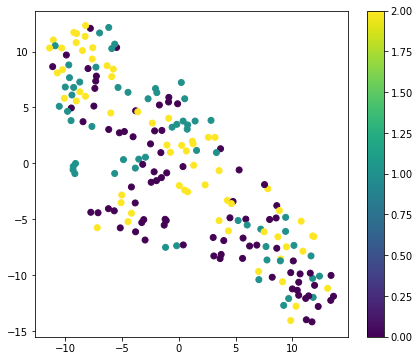

In [27]:
from sklearn.manifold import TSNE
X_reduced = TSNE(random_state=random_state, n_iter=50000, perplexity=30, metric= 'cosine').fit_transform(X)
fig = plt.figure(figsize=(7,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()
plt.show()

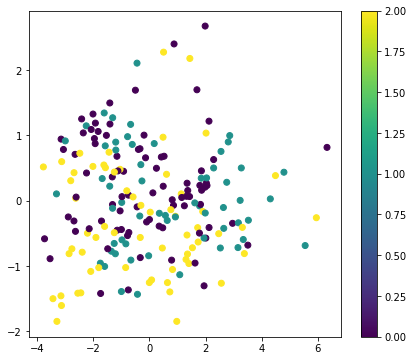

In [12]:
from sklearn.decomposition import PCA

X_reduced = PCA(random_state=random_state).fit_transform(X)
fig = plt.figure(figsize=(7,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()
plt.show()

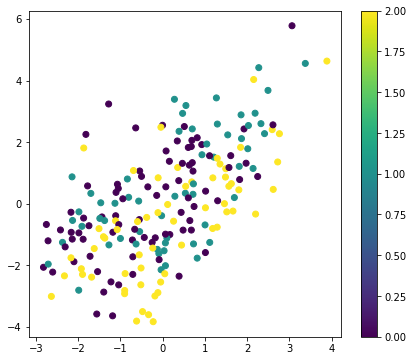

In [13]:
from sklearn.manifold import MDS

X_reduced = MDS(random_state=random_state, n_jobs=8).fit_transform(X)
fig = plt.figure(figsize=(7,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()
plt.show()